In [1]:
import data_utils
import pandas as pd


dataset = data_utils.get_pqrd_dataset()

display(dataset.head())
dataset.shape


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM,year
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i,2017
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i,2017
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i,2017
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i,2017


(2375371, 47)

## A first look into the data

In [3]:
for column in dataset.columns:
    values = set(dataset[column].values)
    if(len(values) < 20):
        print(f'{column}: {values}')

AFEC_EDADR: {'de 13 a 17 años', 'de 30 a 37 años', 'de 18 a 24 años', 'de 25 a 29 años', 'mayor de 63 años', '0', 'de 38 a 49 años', 'de 6 a 12 años', 'de 50 a 62 años', 'de 0 a 5 años'}
AFEC_EDUC: {'universitario incompleto', 'primaria', '0', 'primaria incompleta', 'posgrado', 'universitario', 'ninguno', 'secundaria incompleta', 'secundaria'}
AFEC_GENERO: {'mujer', 'hombre', '0'}
AFEC_GETNICO: {'raizal (del archipiélago de san andrés y providencia)', '0', 'afrocolombiano o afrodescendiente', 'negro', 'mulato', 'rom- gitano', 'palanquero (de san basilio)', 'indígena', 'no aplica'}
AFEC_PARENTESCO: {'ciudador (a)', 'hijo (a)', 'tio (a)', 'amigo (a)', 'ips', 'empleador', 'abuelo (a)', 'otro', '0', 'madre', 'veedor', 'hermano (a)', 'padre', 'nieto (a)', 'representante legal', 'conyugue', 'nombre propio'}
AFEC_POBESPECIAL: {'habitante de la calle', 'desplazado', '0', 'persona en condición de discapacidad', 'trabajador sexual', 'violencia de genero', 'población carcelaria (presos)', 'mujer 

### Ordinal features:
* AFEC_EDADR
* AFEC_EDUC


In [2]:
# Columns with no null values
no_nulls = set(dataset.columns[dataset.isnull().mean()==0])
print(len(no_nulls))
print(no_nulls)

47
{'PQR_TIPOPETICION', 'AFEC_REGAFILIACION', 'ENT_DPTO', 'ENT_TIPOVIG', 'MOTIVO_ESPECIFICO', 'ENT_MPIO', 'PATOLOGIA_TIPO', 'ENT_TIPOVIG_SNS', 'AFEC_EDADR', 'ENT_NOMBRE', 'ENT_MPIO_DANE', 'PET_DPTO', 'PQR_ESTADO', 'ENT_COD_MPIO', 'MES', 'PQR_GRUPOALERTA', 'AFEC_GETNICO', 'AFEC_TIPOPER', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL', 'year', 'ENT_COD_DEPTO', 'CIE_10', 'RIESGO_VIDA', 'MACROMOTIVO', 'ENT_AMBITOIVC', 'PATOLOGIA_1', 'AFEC_DPTO', 'PQR_CANAL', 'TRIM', 'IDRANGOEDADES', 'COD_MOTESP', 'PET_COD_DEPTO', 'PQR_TIPOATENCION', 'AFEC_MPIO', 'AFEC_EDUC', 'AFEC_GENERO', 'ID_MES', 'MOTIVO_GENERAL', 'ALTO_COSTO', 'PET_TIPOPER', 'PET_MPIO', 'ENT_COD_SNS', 'IDPATOLOGIA_2', 'PQR_CLASE_SNS', 'COD_MACROMOT', 'COD_MOTGEN'}


In [3]:
# Columns with no null values
nulls = set(dataset.columns[dataset.isnull().mean()>0])
print(len(nulls))
print(nulls)

0
set()


Although most of columns has no null values, a look into the dataset shows that missing values are represented with '0' values

In [4]:
# Columns with no zero values
no_zero_values = set(dataset.columns[dataset.eq('0').mean() == 0])
print(len(no_zero_values))
print(no_zero_values)

2
{'MES', 'year'}


In [5]:
# Columns with zero values
no_zero_values = set(dataset.columns[dataset.eq('0').mean() > 0])
print(len(no_zero_values))
print(no_zero_values)

45
{'PQR_TIPOPETICION', 'AFEC_REGAFILIACION', 'ENT_DPTO', 'ENT_TIPOVIG', 'MOTIVO_ESPECIFICO', 'ENT_MPIO', 'PATOLOGIA_TIPO', 'ENT_TIPOVIG_SNS', 'AFEC_EDADR', 'ENT_NOMBRE', 'ENT_MPIO_DANE', 'PET_DPTO', 'PQR_ESTADO', 'ENT_COD_MPIO', 'PQR_GRUPOALERTA', 'AFEC_GETNICO', 'AFEC_TIPOPER', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL', 'ENT_COD_DEPTO', 'CIE_10', 'RIESGO_VIDA', 'MACROMOTIVO', 'ENT_AMBITOIVC', 'PATOLOGIA_1', 'AFEC_DPTO', 'PQR_CANAL', 'TRIM', 'IDRANGOEDADES', 'COD_MOTESP', 'PET_COD_DEPTO', 'PQR_TIPOATENCION', 'AFEC_MPIO', 'AFEC_EDUC', 'AFEC_GENERO', 'ID_MES', 'MOTIVO_GENERAL', 'ALTO_COSTO', 'PET_TIPOPER', 'PET_MPIO', 'ENT_COD_SNS', 'IDPATOLOGIA_2', 'PQR_CLASE_SNS', 'COD_MACROMOT', 'COD_MOTGEN'}


In [6]:
most_missing_cols = set(dataset.columns[dataset.eq('0').mean() > 0.75])
print(len(most_missing_cols))
print(most_missing_cols)


3
{'PQR_GRUPOALERTA', 'ALTO_COSTO', 'CIE_10'}


## Is there any part of the population more susceptible to have access to the health care system?

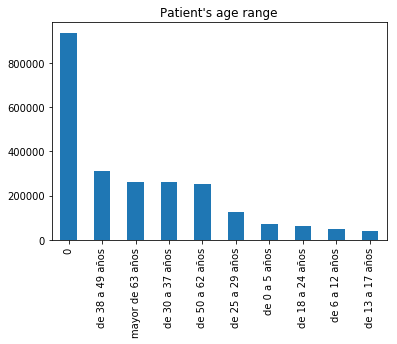

In [7]:
afec_edadr = dataset['AFEC_EDADR'].value_counts().nlargest(n=10, keep='first')
afec_edadr.plot(kind='bar', title='Patient\'s age range');

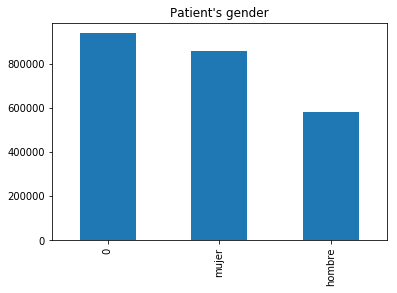

In [8]:
afec_genero = dataset['AFEC_GENERO'].value_counts().nlargest(n=10, keep='first')
afec_genero.plot(kind='bar', title='Patient\'s gender');

## Top 10 of reasons to raise a pqrd.


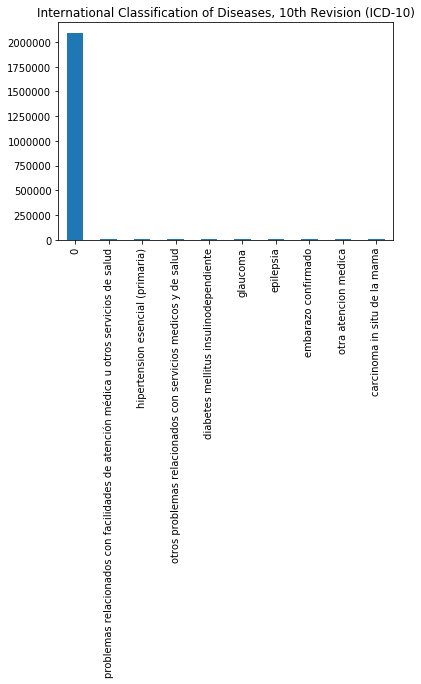

In [9]:
cie_10 = dataset['CIE_10'].value_counts().nlargest(n=10, keep='first')
cie_10.plot(kind='bar', title='International Classification of Diseases, 10th Revision (ICD-10)');

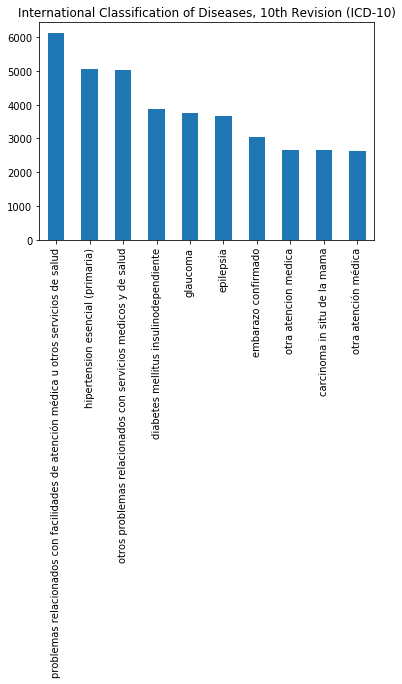

In [10]:
cie_10 = dataset.loc[dataset['CIE_10'] != '0']['CIE_10'].value_counts().nlargest(n=10, keep='first')
cie_10.plot(kind='bar', title='International Classification of Diseases, 10th Revision (ICD-10)');

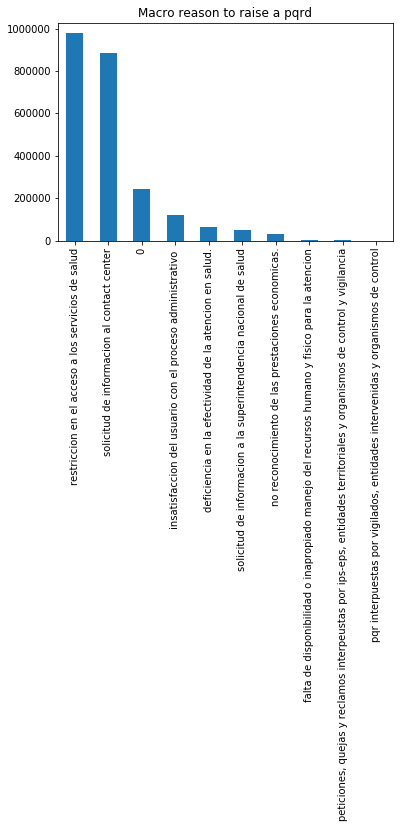

In [11]:
macromotivo = dataset['MACROMOTIVO'].value_counts().nlargest(n=10, keep='first')
macromotivo.plot(kind='bar', title='Macro reason to raise a pqrd');

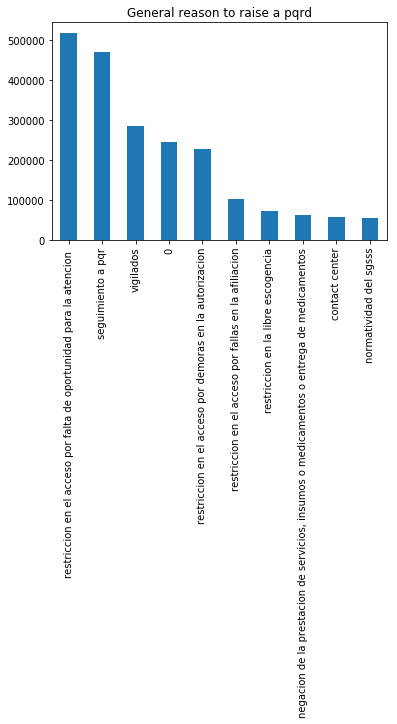

In [12]:
motivo_general = dataset['MOTIVO_GENERAL'].value_counts().nlargest(n=10, keep='first')
motivo_general.plot(kind='bar', title='General reason to raise a pqrd');

## Use of internet for raising pqrds over the time.

C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


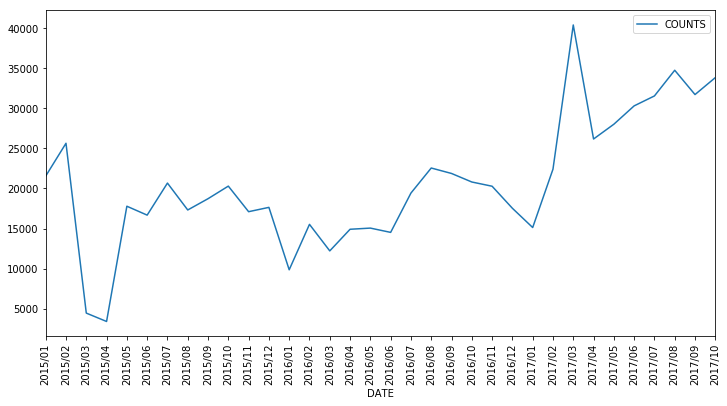

In [13]:
canales_df = dataset.loc[(dataset['PQR_CANAL'] == "chat") | (dataset['PQR_CANAL'] == "correo") | (dataset['PQR_CANAL'] == "web")]

canales_df['DATE'] = canales_df['year'].astype(str) + '/' + canales_df['MES'].astype(str)

canales_counts = canales_df['DATE'].value_counts().sort_index()
canales_counts =  pd.DataFrame({'DATE':canales_counts.index, 'COUNTS':canales_counts.values})

canales_counts.plot(kind='line',x='DATE',y='COUNTS', xticks=canales_counts.index, figsize=(12,6), rot=90)


